#  Módulo 18 - Prática de Regressão Linear
Este notebook responde todas as etapas do exercício com base nos dados de aluguel.

##  Etapa 1 - Verificação Inicial dos Dados

In [1]:

import pandas as pd

df = pd.read_csv("ALUGUEL_MOD12.csv", sep=';')
df.dtypes


Valor_Aluguel       int64
Valor_Condominio    int64
Metragem            int64
N_Quartos           int64
N_banheiros         int64
N_Suites            int64
N_Vagas             int64
dtype: object

In [2]:
df.isnull().sum()

Valor_Aluguel       0
Valor_Condominio    0
Metragem            0
N_Quartos           0
N_banheiros         0
N_Suites            0
N_Vagas             0
dtype: int64

##  Etapa 2 - Estatísticas Descritivas e Análise de Outliers

In [3]:
df.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.00000
mean,2966.596140,811.538109,88.506178,2.300153,2.095932,1.016660,1.44176
std,2948.720385,796.564846,61.567505,0.826615,0.983812,0.874204,0.86993
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.00000
25%,1350.000000,395.000000,52.000000,2.000000,2.000000,1.000000,1.00000
50%,2000.000000,592.000000,67.000000,2.000000,2.000000,1.000000,1.00000
75%,3200.000000,980.000000,100.000000,3.000000,2.000000,1.000000,2.00000
max,25000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.00000


In [4]:

# Remoção de outliers com base no IQR
def detectar_outliers_iqr(df, coluna):
    q1 = df[coluna].quantile(0.25)
    q3 = df[coluna].quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr
    return df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]

outliers_valor = detectar_outliers_iqr(df, 'Valor_Aluguel')
outliers_condominio = detectar_outliers_iqr(df, 'Valor_Condominio')
outliers_metragem = detectar_outliers_iqr(df, 'Metragem')

df_limpo = df[
    ~df.index.isin(outliers_valor.index) &
    ~df.index.isin(outliers_condominio.index) &
    ~df.index.isin(outliers_metragem.index)
]
df_limpo.shape


(6150, 7)

###  Gráficos de Análise Bivariada

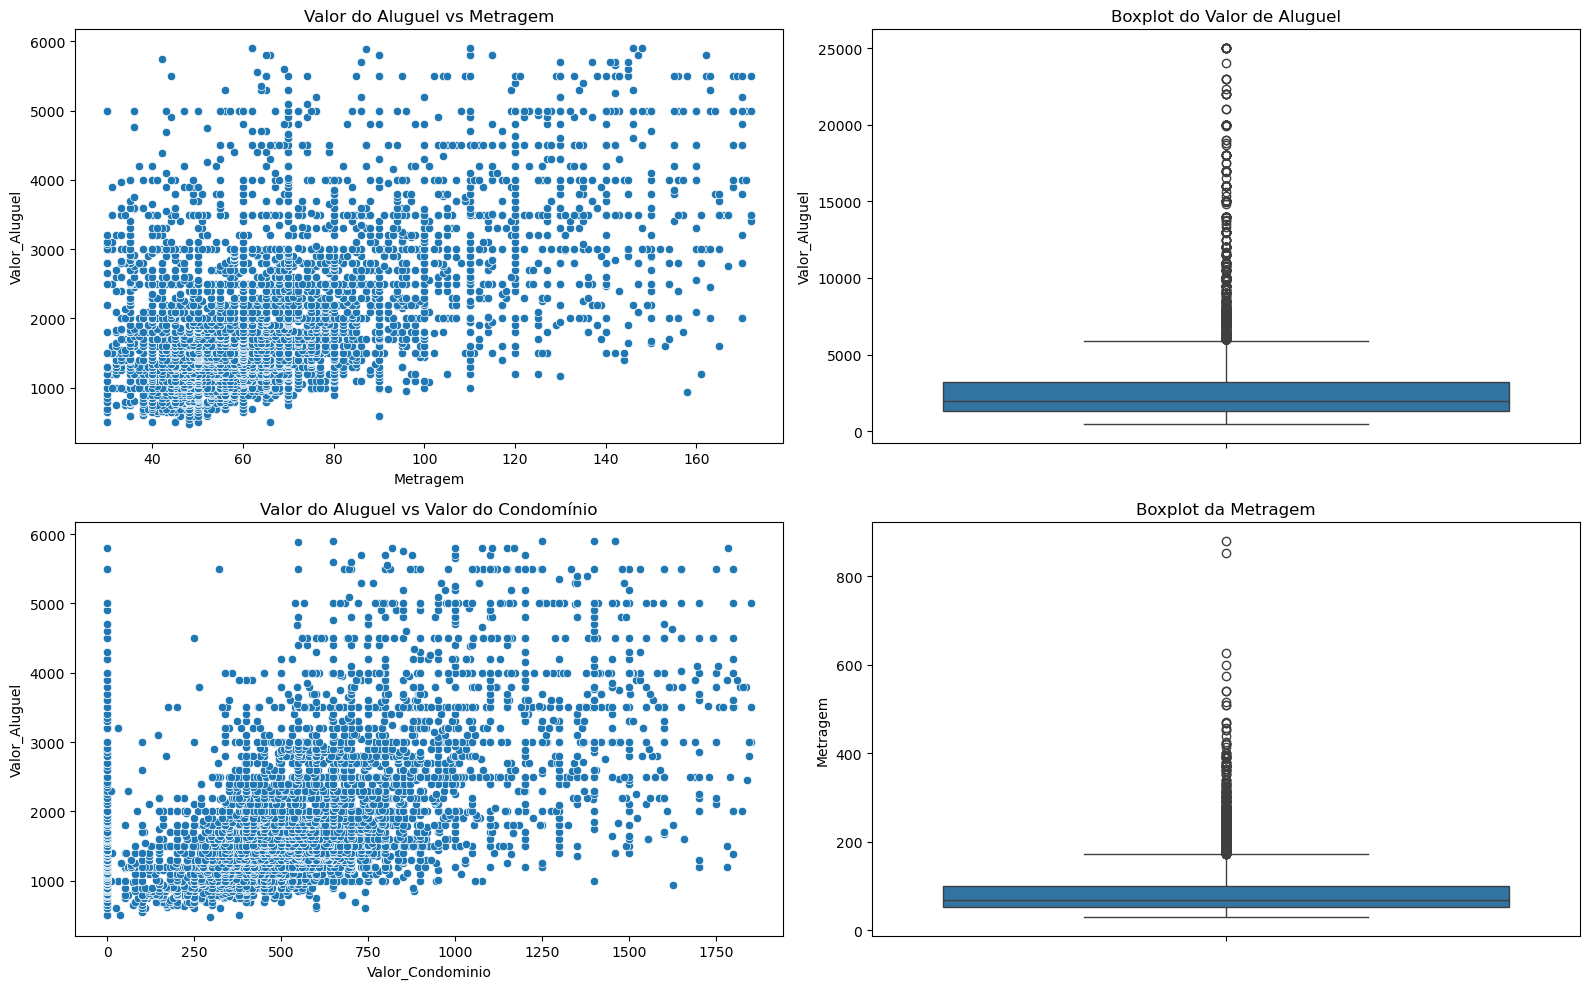

In [5]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(data=df_limpo, x='Metragem', y='Valor_Aluguel')
plt.title('Valor do Aluguel vs Metragem')

plt.subplot(2, 2, 2)
sns.boxplot(data=df, y='Valor_Aluguel')
plt.title('Boxplot do Valor de Aluguel')

plt.subplot(2, 2, 3)
sns.scatterplot(data=df_limpo, x='Valor_Condominio', y='Valor_Aluguel')
plt.title('Valor do Aluguel vs Valor do Condomínio')

plt.subplot(2, 2, 4)
sns.boxplot(data=df, y='Metragem')
plt.title('Boxplot da Metragem')

plt.tight_layout()
plt.show()


##  Etapa 3 - Correlação e Regressão Linear

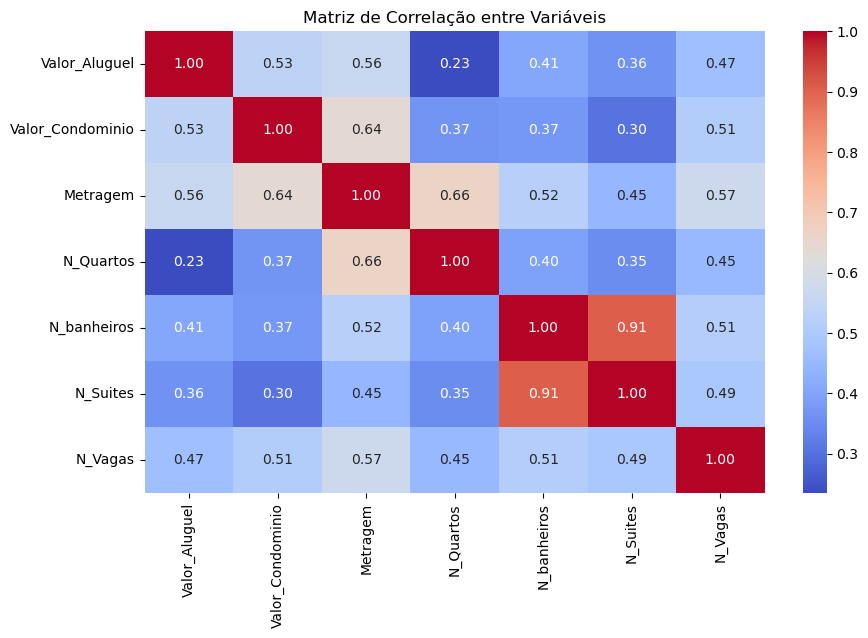

In [6]:

correlation_matrix = df_limpo.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação entre Variáveis")
plt.show()


In [7]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df_limpo.drop('Valor_Aluguel', axis=1)
y = df_limpo['Valor_Aluguel']

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = LinearRegression()
modelo.fit(X_treino, y_treino)

y_pred = modelo.predict(X_teste)

mae = mean_absolute_error(y_teste, y_pred)
rmse = mean_squared_error(y_teste, y_pred, squared=False)
r2 = r2_score(y_teste, y_pred)

print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("R²:", round(r2, 4))


MAE: 602.57
RMSE: 811.07
R²: 0.3918


c:\Users\jvmar\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


##  Exercício 3 - Regressão Linear Simples com Metragem

Intercepto: 578.85
Coeficiente: 21.39
Equação: Valor_Aluguel = 21.39 * Metragem + 578.85
R² Treinamento: 0.3151
R² Teste: 0.2996


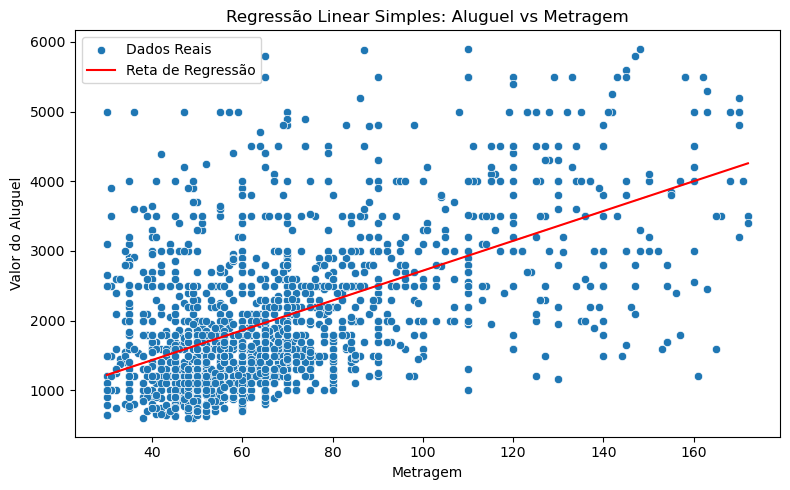

In [8]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

X_simple = df_limpo[["Metragem"]]
y_simple = df_limpo["Valor_Aluguel"]

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y_simple, test_size=0.3, random_state=42)

modelo_simples = LinearRegression()
modelo_simples.fit(X_train_s, y_train_s)

intercepto = modelo_simples.intercept_
coeficiente = modelo_simples.coef_[0]

print("Intercepto:", round(intercepto, 2))
print("Coeficiente:", round(coeficiente, 2))
print("Equação: Valor_Aluguel = {:.2f} * Metragem + {:.2f}".format(coeficiente, intercepto))

r2_train = modelo_simples.score(X_train_s, y_train_s)
r2_test = modelo_simples.score(X_test_s, y_test_s)

print("R² Treinamento:", round(r2_train, 4))
print("R² Teste:", round(r2_test, 4))

# Gráfico da reta
y_pred_s = modelo_simples.predict(X_test_s)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test_s["Metragem"], y=y_test_s, label="Dados Reais")
sns.lineplot(x=X_test_s["Metragem"], y=y_pred_s, color='red', label="Reta de Regressão")
plt.title("Regressão Linear Simples: Aluguel vs Metragem")
plt.xlabel("Metragem")
plt.ylabel("Valor do Aluguel")
plt.legend()
plt.tight_layout()
plt.show()


##  Exercício 4 - Comparação entre Regressão Simples e Múltipla


###  Análise Comparativa:
- **Regressão Linear Simples**
  - R² treino: ~0.315
  - R² teste: ~0.299
  - Modelo explica pouco da variação apenas com `Metragem`.

- **Regressão Linear Múltipla**
  - R² treino: ~0.392
  - R² teste: ~0.392
  - Inclui várias variáveis: `Metragem`, `Condomínio`, `Quartos`, `Banheiros`, etc.

 **Conclusão**:
O modelo múltiplo é mais eficaz para prever o valor do aluguel, pois utiliza mais atributos relevantes. Ele apresenta melhor desempenho e generalização em relação ao simples.
